In [102]:
# Import necessary libraries
import pandas as pd
import numpy as np

# NLP libraries
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

# ML libraries
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import joblib

# Neural Networks libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import Dense, LSTM, Dropout, Bidirectional,Flatten
from keras.models import Sequential
     
# Visualization librations
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud libraries
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
import requests

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [103]:
# lemmatizer
lm = WordNetLemmatizer()

# Checks if given word contains a special character
def contains_special(word):
    for char in word:
        if char.isnumeric() or (not char.isalnum()):
            return True
    return False

# process sentences
def process_sentences(sentence):
    # tokenize, lemmatize, and remove special characters
    processed = [lm.lemmatize(word.lower()) for word in nltk.word_tokenize(sentence)
          # make sure no strings that contain only numeric characters
          if not contains_special(word)]
    return ' '.join(processed)

In [104]:
# get data
df = pd.read_csv('tweets.csv')
# drop duplicates
df.drop_duplicates(inplace =True)
X = df['text']
y = df['target']

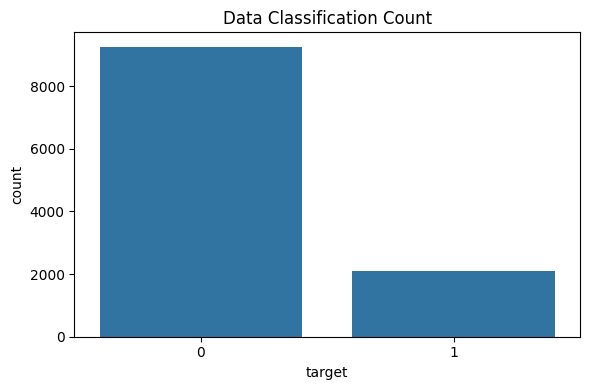

In [105]:
y.value_counts()

#Plot counts
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'target')
plt.title('Data Classification Count')
plt.tight_layout()
plt.savefig("Data Classification Count")

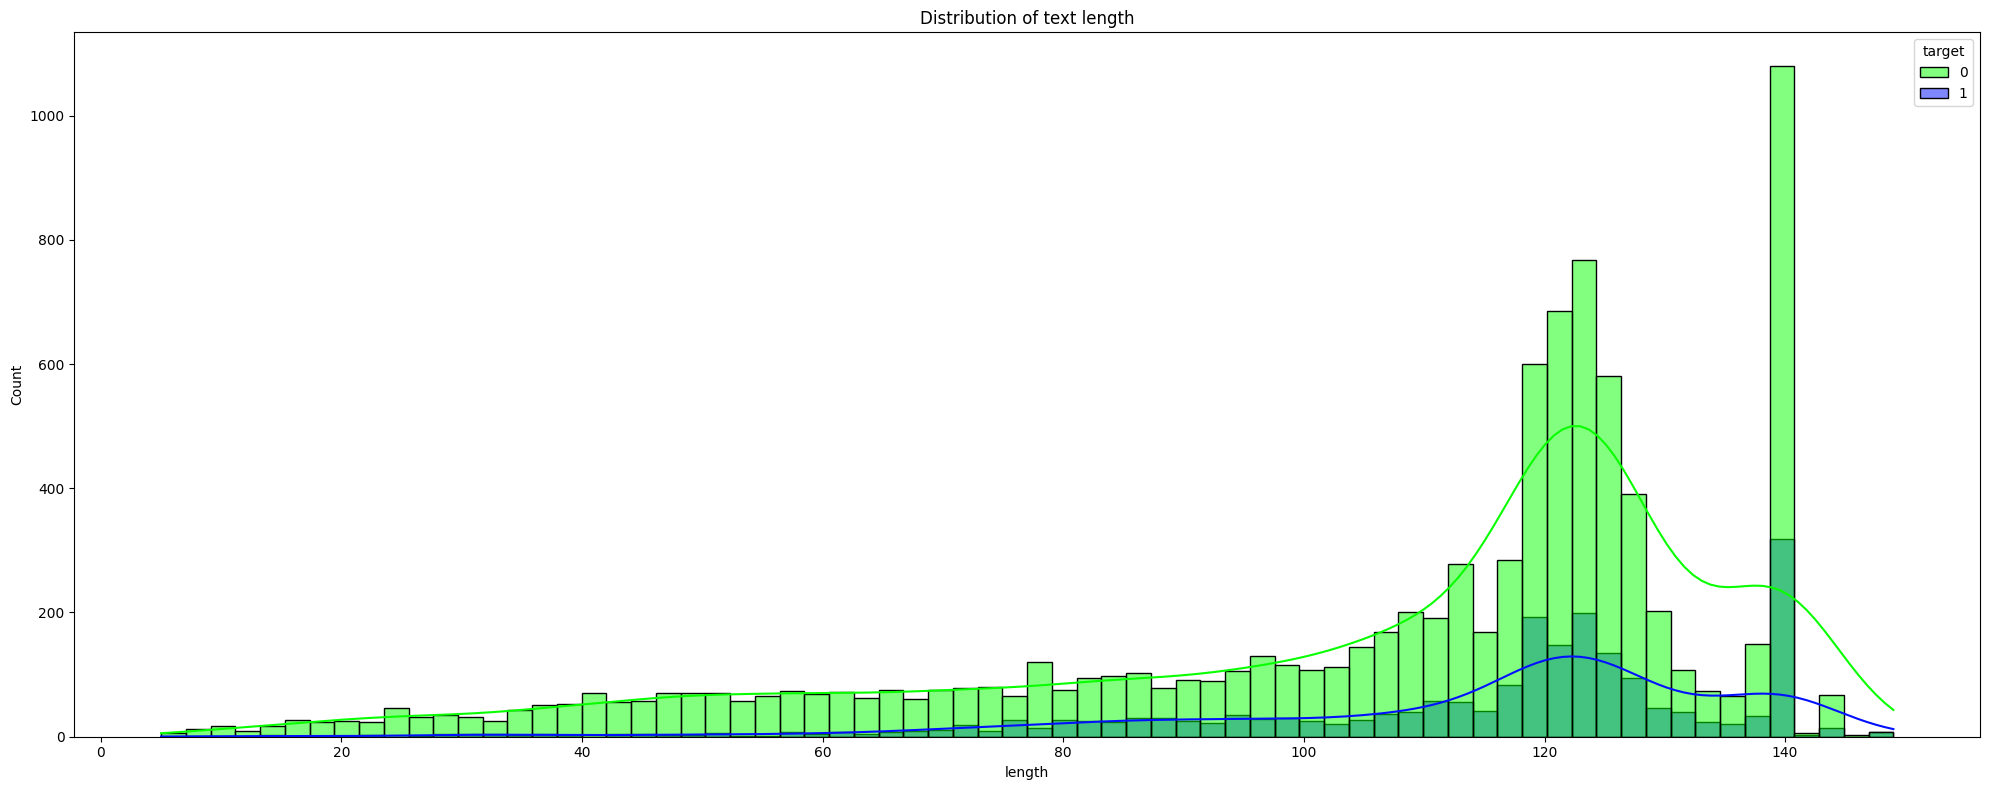

In [106]:
#Histogram of text length
df['length'] = df['text'].apply(len)

plt.figure(figsize=(20,8))
sns.histplot(data=df, x='length', hue='target', palette='hsv', kde=True, bins=70)
plt.title('Distribution of text length')
plt.tight_layout()
plt.show()


In [107]:
# text pre-processing
X = X.apply(process_sentences)

In [108]:
X[0]

'communal violence in bhainsa telangana stone were pelted on muslim house and some house and vehicle were set'

In [109]:

# Convert text data into BoW features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
vocabulary = vectorizer.vocabulary_
print('Vocab size: ' + str(len(vocabulary)))
joblib.dump(vectorizer, "vectorizer.pk1")


Vocab size: 16985


['vectorizer.pk1']

In [110]:
vocabulary['house']

6955

In [111]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25, random_state=1)


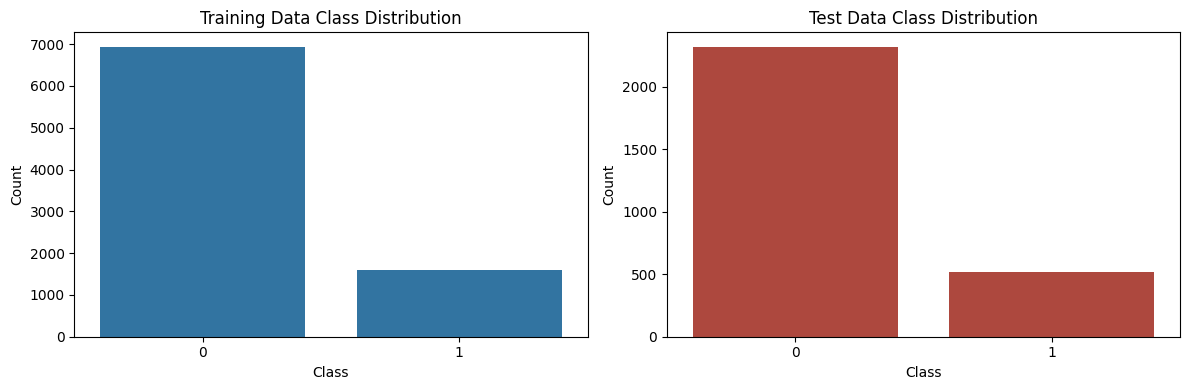

In [112]:
# Plot count graphs for train and test sets
plt.figure(figsize=(12, 4))

train_class_counts = pd.Series(y_train).value_counts().sort_index()
test_class_counts = pd.Series(y_test).value_counts().sort_index()

plt.subplot(1, 2, 1)
sns.barplot(x=train_class_counts.index, y=train_class_counts.values)
plt.title('Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=test_class_counts.index, y=test_class_counts.values, color='#C0392B')
plt.title('Test Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig("Separated Data Classification Count")

In [113]:
# Naive Bayes
def naive_bayes(X_train, X_test, y_train, y_test):
    # increased max iter to prevent early time out
    clf = MultinomialNB().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test,
                                    y_pred))
    
    # save model
    joblib.dump(clf, "naive_bayes_model.pk1")

    return y_pred

print('Naive Bayes\n')
ypred_nb = naive_bayes(X_train, X_test, y_train, y_test)

Naive Bayes

accuracy: 0.8695040450228632
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2321
           1       0.65      0.62      0.64       522

    accuracy                           0.87      2843
   macro avg       0.78      0.77      0.78      2843
weighted avg       0.87      0.87      0.87      2843



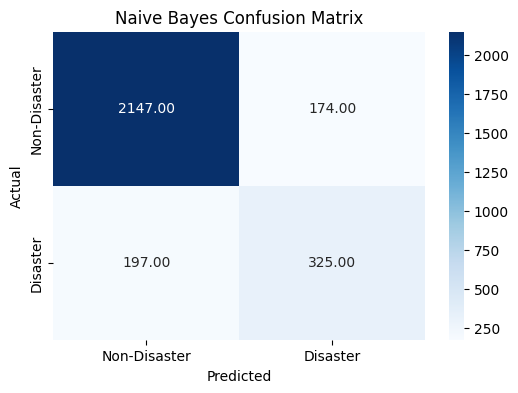

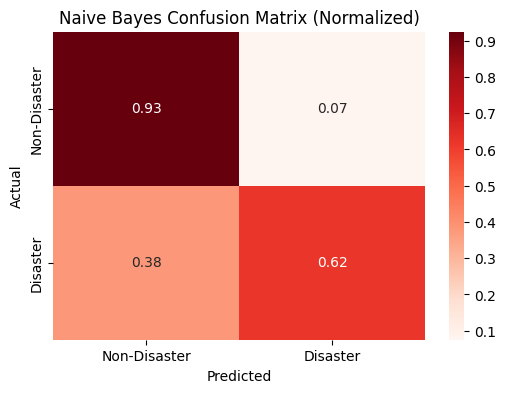

In [114]:
#Plot Naive Bayes confusion matrices
cf_matrix = confusion_matrix(y_test, ypred_nb)
categories = ['Non-Disaster', 'Disaster']
cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (6,4))
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.savefig("Naive Bayes Confusion Matrix")

plt.figure(figsize= (6,4))
sns.heatmap(cf_normalized, annot=True, fmt='.2f', cmap='Reds',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix (Normalized)')
plt.savefig("Naive Bayes Confusion Matrix Normalized")


In [115]:
# Logistic Regression
def logistic_regression(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    # scale data to reduce ranges
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # increased max iter to prevent early time out
    clf = LogisticRegression(max_iter = 500).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test,
                                    y_pred))

    # save model
    joblib.dump(clf, "logistic_regression_model.pk1")

    return y_pred

print('Logistic Regression\n')
ypred_lr = logistic_regression(X_train, X_test, y_train, y_test)

Logistic Regression

accuracy: 0.8712627506155469
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2321
           1       0.67      0.58      0.62       522

    accuracy                           0.87      2843
   macro avg       0.79      0.76      0.77      2843
weighted avg       0.87      0.87      0.87      2843



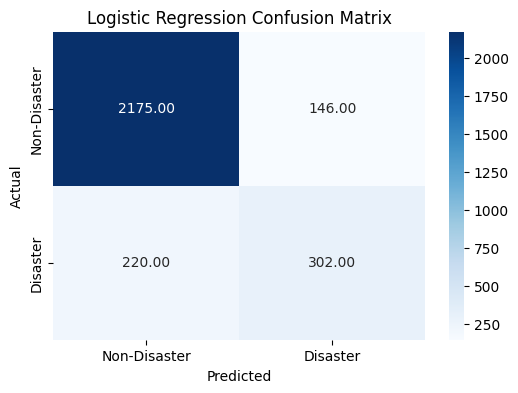

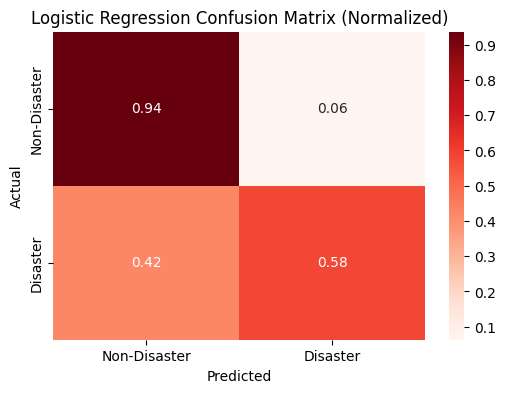

In [116]:
#Plot Logistic Regression confusion matrix
cf_matrix = confusion_matrix(y_test, ypred_lr)
categories = ['Non-Disaster', 'Disaster']
cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (6,4))
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('Logistic Regression Confusion Matrix')

plt.figure(figsize= (6,4))
sns.heatmap(cf_normalized, annot=True, fmt='.2f', cmap='Reds',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (Normalized)')
plt.savefig('Logistic Regression Confusion Matrix Normalized')

In [117]:
# get data
df = pd.read_csv('tweets.csv')
# drop duplicates
df.drop_duplicates(inplace =True)

X = df['text']
y = df['target']

# text pre-pro|cessing
X = X.apply(process_sentences)

In [118]:
from gensim.models import Word2Vec

def get_embeddings(data, size):
  return Word2Vec(sentences=data, vector_size=size, window=5, min_count=1,
                 sg=1)

# get a mapping of word -> embedding, word_index -> embedding
def map_embeddings(model, tokenizer):
    # all vocab
    vocab = list(model.wv.index_to_key)
    # word to word index map
    word_index = tokenizer.word_index
    # word to embedding map
    word_embed = {}
    # word index to embedding map
    index_embed = {}

    for w in vocab:
        # get current word's embedding
        e = model.wv[w]
        # set embedding for current word
        word_embed[w] = e
        # set embedding for current word index
        curr_index = word_index[w]
        index_embed[curr_index] = e
    return word_embed, index_embed

# pre-padding data to fixed length token for NN input
def pre_padding(encoded, seq_length, model):
    if model == "rnn":
      X = []
      for row in encoded:
          for i in range(1, len(row) - 1):
              X.append(row[:i])
    X = pad_sequences(encoded, maxlen = seq_length)
    return X

# convert data into 3D matrix (total rows, max sequence length, embedding size) for LSTM
def reshape_data(X, index_embed):
  reshaped = []
  for seq in X:
    # get embeddings for each word index in sequence
    seq_embed = [index_embed[index] for index in seq]
    reshaped.append(seq_embed)
  # convert to numpy array
  return np.array(reshaped)


def data_generator(X, y, num_sequences, index_embed, model) -> (list,list):
    i = 0
    while i < len(X):
        # end range of data for current batch
        end_index = i + num_sequences
        # reached end of our dataset
        if end_index >= len(X) - 1:
            i = 0
            end_index = i + num_sequences

        if model == "ffnn":
          # we need to flatten our inputs for a feedforward network
          inputs = [input.flatten() for input in X[i:end_index]]
        else:
          inputs = [val for val in X[i:end_index]]

        outputs = [val for val in y[i:end_index]]
        yield np.array(inputs), np.array(outputs)
        i += num_sequences

     

In [119]:

# process data for Gensim's Word2Vec
X = X.apply(nltk.word_tokenize)
word2vec = get_embeddings(X,200)
vocab_size = len(word2vec.wv.index_to_key)
print('Vocab size {}'.format(vocab_size))
joblib.dump(word2vec, "word2vec_vectorizer.pk1")


Vocab size 17020


['word2vec_vectorizer.pk1']

In [120]:
word2vec.wv.most_similar('people', topn = 10)


[('those', 0.947460949420929),
 ('many', 0.9147442579269409),
 ('these', 0.9042897820472717),
 ('their', 0.8880943655967712),
 ('american', 0.8862487077713013),
 ('innocent', 0.8810361623764038),
 ('animal', 0.8793439865112305),
 ('hostage', 0.8740041255950928),
 ('asking', 0.8685529828071594),
 ('died', 0.8669628500938416)]

In [121]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
embedding_size = 200
# embeddings
word_embed, index_embed = map_embeddings(word2vec, tokenizer)
# set embeddings for zero index
index_embed[0] = np.zeros((embedding_size,))
word_embed[''] = np.zeros((embedding_size,))
vocab_size = len(word_embed.keys())

In [122]:
# encode data into word indexes
encoded_data = tokenizer.texts_to_sequences(X)
# max sequence length
max_sequence_length = np.max([len(seq) for seq in encoded_data])
# prepadding on data
ffnn_pre_padded_X = pre_padding(encoded_data, max_sequence_length, "ffnn")
rnn_pre_padded_X = pre_padding(encoded_data, max_sequence_length, "rnn")

In [123]:
# convert pre-padded and encoded data into 3D shape for FFNN input
ffnn_X = reshape_data(ffnn_pre_padded_X, index_embed)
print(ffnn_X.shape)

(11370, 30, 200)


In [124]:

# convert pre-padded and encoded data into 3D shape for FFNN input
rnn_X = reshape_data(rnn_pre_padded_X, index_embed)
print(rnn_X.shape)
     

(11370, 30, 200)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(ffnn_X, y, test_size=0.25, random_state=1)


In [126]:
# Feedforward Neural Network
# hyperparameters
epochs = 10
batches = 256
steps = len(X_train)//batches

# data generator
train_generator = data_generator(X_train, y_train, batches, index_embed, "ffnn")

# architecture
model = Sequential()
model.add(Dense(200, activation='relu', input_dim = max_sequence_length * embedding_size))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# sigmoid for binary classification
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x= train_generator,
          steps_per_epoch= steps,
          epochs= epochs, verbose = 1)

print(model.output)

# save model
joblib.dump(model, "feed_forward_model.pk1")


Epoch 1/10
33/33 [==============================] - 2s 16ms/step - loss: 0.4259 - accuracy: 0.8210
Epoch 2/10
33/33 [==============================] - 1s 17ms/step - loss: 0.3606 - accuracy: 0.8511
Epoch 3/10
33/33 [==============================] - 1s 17ms/step - loss: 0.3451 - accuracy: 0.8584
Epoch 4/10
33/33 [==============================] - 1s 17ms/step - loss: 0.3301 - accuracy: 0.8655
Epoch 5/10
33/33 [==============================] - 1s 16ms/step - loss: 0.3233 - accuracy: 0.8694
Epoch 6/10
33/33 [==============================] - 1s 16ms/step - loss: 0.3178 - accuracy: 0.8718
Epoch 7/10
33/33 [==============================] - 1s 16ms/step - loss: 0.3083 - accuracy: 0.8757
Epoch 8/10
33/33 [==============================] - 1s 18ms/step - loss: 0.3001 - accuracy: 0.8804
Epoch 9/10
33/33 [==============================] - 1s 15ms/step - loss: 0.2938 - accuracy: 0.8825
Epoch 10/10
33/33 [==============================] - 1s 17ms/step - loss: 0.2862 - accuracy: 0.8846
KerasTens

['feed_forward_model.pk1']

89/89 [==============================] - 0s 3ms/step
0.8501582835033415


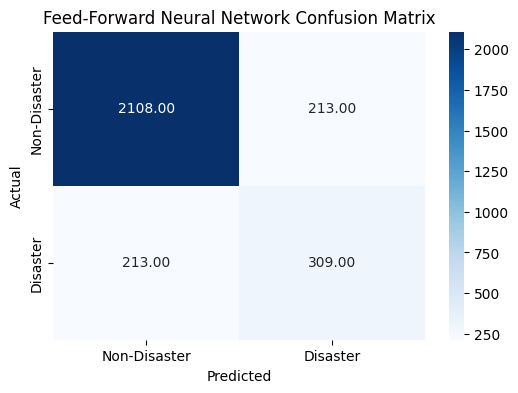

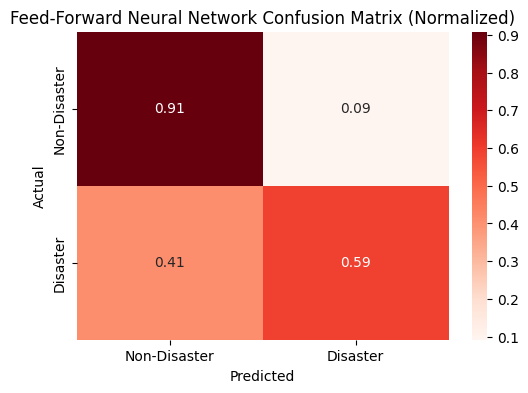

In [127]:
#Plot Feed-foward Neural Network confusion matrix
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
predictions = model.predict(X_test_reshaped)
threshold = 0.5
y_pred = (predictions > threshold).astype(int)
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Non-Disaster', 'Disaster']
cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (6,4))
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Feed-Forward Neural Network Confusion Matrix')
plt.savefig('Feed-Forward Neural Network Confusion Matrix')

plt.figure(figsize= (6,4))
sns.heatmap(cf_normalized, annot=True, fmt='.2f', cmap='Reds',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Feed-Forward Neural Network Confusion Matrix (Normalized)')
plt.savefig('Feed-Forward Neural Network Confusion Matrix Normalized')

accuracy = (cf_matrix[0, 0] + cf_matrix[1, 1]) / np.sum(cf_matrix)  # Calculate accuracy

print(accuracy)



In [128]:
X_train, X_test, y_train, y_test = train_test_split(rnn_X, y, test_size=0.25, random_state=1)

In [129]:
# LSTM
# hyperparameters
epochs = 5
batches = 256
steps = len(X_train)//batches

# Data generator
train_generator = data_generator(X_train, y_train, batches, index_embed, "rnn")

# Architecture
model = Sequential()
# LSTM input layer
model.add(LSTM(200, input_shape=(max_sequence_length, embedding_size),return_sequences=True))
# Dropout layer to prevent overfitting
model.add(Dropout(0.2))
# LSTM layer
model.add(LSTM(128, input_shape=(max_sequence_length, embedding_size),return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.2))
# sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x= train_generator,
          steps_per_epoch= steps,
          epochs= epochs, verbose = 1)

print(model.output)

# save model
joblib.dump(model, "lstm_model.pk1")


Epoch 1/5
33/33 [==============================] - 14s 232ms/step - loss: 0.4365 - accuracy: 0.8265
Epoch 2/5
33/33 [==============================] - 8s 229ms/step - loss: 0.3688 - accuracy: 0.8460
Epoch 3/5
33/33 [==============================] - 8s 233ms/step - loss: 0.3576 - accuracy: 0.8522
Epoch 4/5
33/33 [==============================] - 8s 232ms/step - loss: 0.3501 - accuracy: 0.8513
Epoch 5/5
33/33 [==============================] - 8s 235ms/step - loss: 0.3433 - accuracy: 0.8556
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_22/Sigmoid:0', description="created by layer 'dense_22'")


['lstm_model.pk1']

89/89 [==============================] - 4s 26ms/step
0.8670418571931059


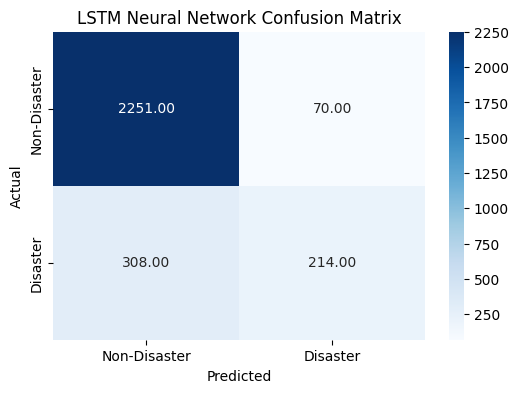

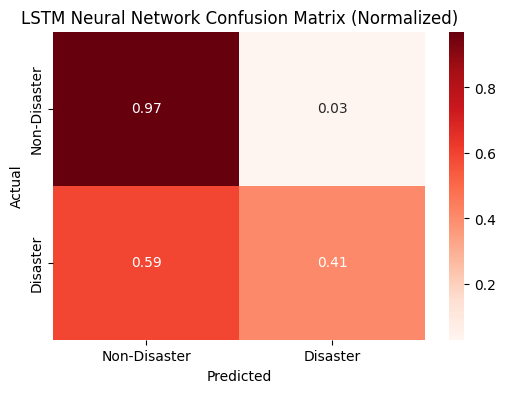

In [130]:
#Plot LSTM Neural Network confusion matrix
predictions = model.predict(X_test)
threshold = 0.5
y_pred = (predictions > threshold).astype(int)
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Non-Disaster', 'Disaster']
cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (6,4))
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Neural Network Confusion Matrix')
plt.savefig('LSTM Neural Network Confusion Matrix')

plt.figure(figsize= (6,4))
sns.heatmap(cf_normalized, annot=True, fmt='.2f', cmap='Reds',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Neural Network Confusion Matrix (Normalized)')
plt.savefig('LSTM Neural Network Confusion Matrix Normalized')

accuracy = (cf_matrix[0, 0] + cf_matrix[1, 1]) / np.sum(cf_matrix)  # Calculate accuracy

print(accuracy)

In [131]:
# Recurrent Neural Networks : Bidirectional LSTM
# hyperparameters
epochs = 5
batches = 256
steps = len(X_train)//batches

# Data generator
train_generator = data_generator(X_train, y_train, batches, index_embed, "rnn")

# Model architecture
model = Sequential()
# LSTM input layer
model.add(LSTM(128, input_shape=(max_sequence_length, embedding_size),return_sequences=True))
model.add(LSTM(64, input_shape=(max_sequence_length, embedding_size),return_sequences=True))
# Dropout layer to prevent overfitting
model.add(Dropout(0.2))
# Bidirectional LSTM layer for extra context
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
# sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x= train_generator,
          steps_per_epoch= steps,
          epochs= epochs, verbose = 1)

print(model.output)

# save model
joblib.dump(model, "bidirectional_lstm_model.pk1")


Epoch 1/5
33/33 [==============================] - 11s 145ms/step - loss: 0.4926 - accuracy: 0.7937
Epoch 2/5
33/33 [==============================] - 5s 143ms/step - loss: 0.3908 - accuracy: 0.8376
Epoch 3/5
33/33 [==============================] - 5s 136ms/step - loss: 0.3630 - accuracy: 0.8485
Epoch 4/5
33/33 [==============================] - 5s 140ms/step - loss: 0.3531 - accuracy: 0.8545
Epoch 5/5
33/33 [==============================] - 5s 142ms/step - loss: 0.3437 - accuracy: 0.8563
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_23/Sigmoid:0', description="created by layer 'dense_23'")


['bidirectional_lstm_model.pk1']

89/89 [==============================] - 3s 18ms/step
0.8673935983116426


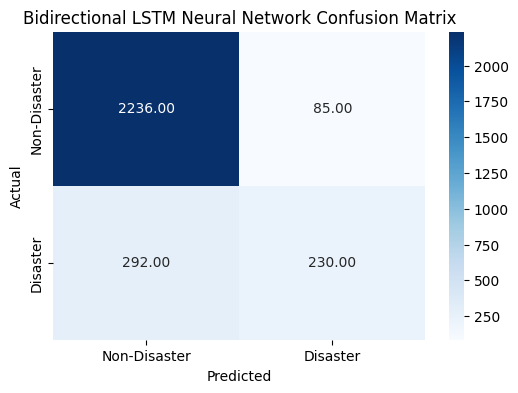

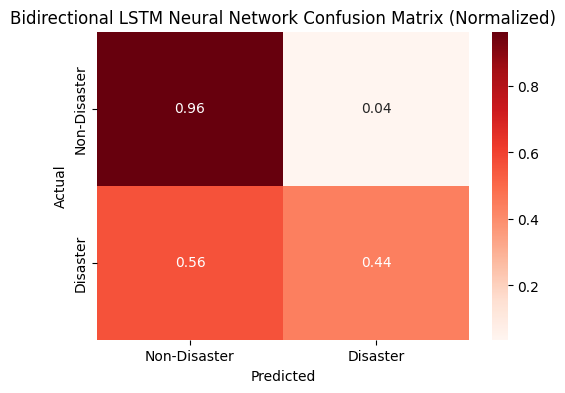

In [132]:
#Plot Bidirectional LSTM Neural Network confusion matrix
predictions = model.predict(X_test)
threshold = 0.5
y_pred = (predictions > threshold).astype(int)
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Non-Disaster', 'Disaster']
cf_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize= (6,4))
sns.heatmap(cf_matrix, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bidirectional LSTM Neural Network Confusion Matrix')
plt.savefig('Bidirectional LSTM Neural Network Confusion Matrix')

plt.figure(figsize= (6,4))
sns.heatmap(cf_normalized, annot=True, fmt='.2f', cmap='Reds',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bidirectional LSTM Neural Network Confusion Matrix (Normalized)')
plt.savefig('Bidirectional LSTM Neural Network Confusion Matrix Normalized')

accuracy = (cf_matrix[0, 0] + cf_matrix[1, 1]) / np.sum(cf_matrix)  # Calculate accuracy

print(accuracy)